In [1]:
import pandas as pd
import numpy  as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Lenovo\Documents\KAGGLE\house-prices\train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df = df.drop('Id',axis=1)

In [6]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train = df.drop('SalePrice',axis=1)

In [8]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
categorical_cols_train   = [cname for cname in train.columns if train[cname].nunique() < 10 and train[cname].dtype=="object"]
numerical_cols_train = [cname for cname in train.columns if train[cname].dtype in ['int64','float64']]

In [11]:
numerical_cols_train   = train[numerical_cols_train]
categorical_cols_train = train[categorical_cols_train]

In [12]:
numerical_cols_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [13]:
categorical_cols_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
test = pd.read_csv(r'C:\Users\Lenovo\Documents\KAGGLE\house-prices\test.csv')

In [15]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [16]:
categorical_cols_test = [cname for cname in test.columns if test[cname].nunique() < 10 and test[cname].dtype=="object"]
numerical_cols_test   = [cname for cname in test.columns if test[cname].dtype in ['int64','float64']]

In [17]:
categorical_cols_test = test[categorical_cols_test]
numerical_cols_test   = test[numerical_cols_test]

In [18]:
categorical_cols_test.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
numerical_cols_test = numerical_cols_test.drop('Id',axis=1)

In [20]:
numerical_cols_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [21]:
from sklearn.impute import SimpleImputer

In [22]:
simple_imputer = SimpleImputer()

In [23]:
imputed_numerical_cols_train = pd.DataFrame(simple_imputer.fit_transform(numerical_cols_train))
imputed_numerical_cols_test  = pd.DataFrame(simple_imputer.transform(numerical_cols_test))

In [24]:
imputed_numerical_cols_train.columns = numerical_cols_train.columns
imputed_numerical_cols_test.columns  = numerical_cols_test.columns

In [25]:
imputed_numerical_cols_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [26]:
imputed_numerical_cols_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0


In [74]:
categorical_cols_train.head()

,SaleType,SaleCondition,LotConfig,HeatingQC,RoofStyle,HouseStyle,Foundation,Condition1
0,WD,Normal,Inside,Ex,Gable,2Story,PConc,Norm
1,WD,Normal,FR2,Ex,Gable,1Story,CBlock,Feedr
2,WD,Normal,Inside,Ex,Gable,2Story,PConc,Norm
3,WD,Abnorml,Corner,Gd,Gable,2Story,BrkTil,Norm
4,WD,Normal,FR2,Ex,Gable,2Story,PConc,Norm


<AxesSubplot:>

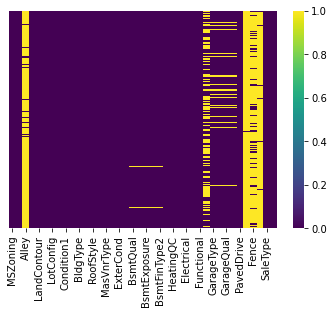

In [27]:
sns.heatmap(categorical_cols_train.isnull(),cmap='viridis',yticklabels=False)

In [28]:
cat_train = ['SaleType','SaleCondition','LotConfig','HeatingQC','RoofStyle','HouseStyle','Foundation','Condition1','Street','LotShape','Neighborhood','ExterQual','Heating','RoofMatl','Condition2','LandContour','LandSlope']
cat_test = ['SaleType','SaleCondition','LotConfig','HeatingQC','RoofStyle','HouseStyle','Foundation','Condition1','Street','LotShape','Neighborhood','ExterQual','Heating','RoofMatl','Condition2','LandContour','LandSlope']

In [29]:
categorical_cols_train = train[cat_train]
categorical_cols_test  = test[cat_test]

In [30]:
categorical_cols_train.head()

,SaleType,SaleCondition,LotConfig,HeatingQC,RoofStyle,HouseStyle,Foundation,Condition1,Street,LotShape,Neighborhood,ExterQual,Heating,RoofMatl,Condition2,LandContour,LandSlope
0,WD,Normal,Inside,Ex,Gable,2Story,PConc,Norm,Pave,Reg,CollgCr,Gd,GasA,CompShg,Norm,Lvl,Gtl
1,WD,Normal,FR2,Ex,Gable,1Story,CBlock,Feedr,Pave,Reg,Veenker,TA,GasA,CompShg,Norm,Lvl,Gtl
2,WD,Normal,Inside,Ex,Gable,2Story,PConc,Norm,Pave,IR1,CollgCr,Gd,GasA,CompShg,Norm,Lvl,Gtl
3,WD,Abnorml,Corner,Gd,Gable,2Story,BrkTil,Norm,Pave,IR1,Crawfor,TA,GasA,CompShg,Norm,Lvl,Gtl
4,WD,Normal,FR2,Ex,Gable,2Story,PConc,Norm,Pave,IR1,NoRidge,Gd,GasA,CompShg,Norm,Lvl,Gtl


In [31]:
categorical_cols_test.head()

,SaleType,SaleCondition,LotConfig,HeatingQC,RoofStyle,HouseStyle,Foundation,Condition1,Street,LotShape,Neighborhood,ExterQual,Heating,RoofMatl,Condition2,LandContour,LandSlope
0,WD,Normal,Inside,TA,Gable,1Story,CBlock,Feedr,Pave,Reg,NAmes,TA,GasA,CompShg,Norm,Lvl,Gtl
1,WD,Normal,Corner,TA,Hip,1Story,CBlock,Norm,Pave,IR1,NAmes,TA,GasA,CompShg,Norm,Lvl,Gtl
2,WD,Normal,Inside,Gd,Gable,2Story,PConc,Norm,Pave,IR1,Gilbert,TA,GasA,CompShg,Norm,Lvl,Gtl
3,WD,Normal,Inside,Ex,Gable,2Story,PConc,Norm,Pave,IR1,Gilbert,TA,GasA,CompShg,Norm,Lvl,Gtl
4,WD,Normal,Inside,Ex,Gable,1Story,PConc,Norm,Pave,IR1,StoneBr,Gd,GasA,CompShg,Norm,HLS,Gtl


In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
ordinal_encoder = OrdinalEncoder()

In [34]:
encoded_categorical_cols_train = pd.DataFrame(ordinal_encoder.fit_transform(categorical_cols_train))
encoded_categorical_cols_test  = pd.DataFrame(ordinal_encoder.transform(categorical_cols_test))

In [35]:
encoded_categorical_cols_train.columns = categorical_cols_train.columns
encoded_categorical_cols_test.columns  = categorical_cols_test.columns

In [36]:
encoded_categorical_cols_train.head()

,SaleType,SaleCondition,LotConfig,HeatingQC,RoofStyle,HouseStyle,Foundation,Condition1,Street,LotShape,Neighborhood,ExterQual,Heating,RoofMatl,Condition2,LandContour,LandSlope
0,8.0,4.0,4.0,0.0,1.0,5.0,2.0,2.0,1.0,3.0,5.0,2.0,1.0,1.0,2.0,3.0,0.0
1,8.0,4.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,3.0,24.0,3.0,1.0,1.0,2.0,3.0,0.0
2,8.0,4.0,4.0,0.0,1.0,5.0,2.0,2.0,1.0,0.0,5.0,2.0,1.0,1.0,2.0,3.0,0.0
3,8.0,0.0,0.0,2.0,1.0,5.0,0.0,2.0,1.0,0.0,6.0,3.0,1.0,1.0,2.0,3.0,0.0
4,8.0,4.0,2.0,0.0,1.0,5.0,2.0,2.0,1.0,0.0,15.0,2.0,1.0,1.0,2.0,3.0,0.0


In [37]:
encoded_categorical_cols_test.head()

,SaleType,SaleCondition,LotConfig,HeatingQC,RoofStyle,HouseStyle,Foundation,Condition1,Street,LotShape,Neighborhood,ExterQual,Heating,RoofMatl,Condition2,LandContour,LandSlope
0,8.0,4.0,4.0,4.0,1.0,2.0,1.0,1.0,1.0,3.0,12.0,3.0,1.0,1.0,2.0,3.0,0.0
1,8.0,4.0,0.0,4.0,3.0,2.0,1.0,2.0,1.0,0.0,12.0,3.0,1.0,1.0,2.0,3.0,0.0
2,8.0,4.0,4.0,2.0,1.0,5.0,2.0,2.0,1.0,0.0,8.0,3.0,1.0,1.0,2.0,3.0,0.0
3,8.0,4.0,4.0,0.0,1.0,5.0,2.0,2.0,1.0,0.0,8.0,3.0,1.0,1.0,2.0,3.0,0.0
4,8.0,4.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0


In [38]:
X_train = pd.concat([imputed_numerical_cols_train,encoded_categorical_cols_train],axis=1)

In [39]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Condition1,Street,LotShape,Neighborhood,ExterQual,Heating,RoofMatl,Condition2,LandContour,LandSlope
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,2.0,1.0,3.0,5.0,2.0,1.0,1.0,2.0,3.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,1.0,1.0,3.0,24.0,3.0,1.0,1.0,2.0,3.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,2.0,1.0,0.0,5.0,2.0,1.0,1.0,2.0,3.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,2.0,1.0,0.0,6.0,3.0,1.0,1.0,2.0,3.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,2.0,1.0,0.0,15.0,2.0,1.0,1.0,2.0,3.0,0.0


In [40]:
X_test = pd.concat([imputed_numerical_cols_test,encoded_categorical_cols_test],axis=1)

In [41]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Condition1,Street,LotShape,Neighborhood,ExterQual,Heating,RoofMatl,Condition2,LandContour,LandSlope
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,1.0,1.0,3.0,12.0,3.0,1.0,1.0,2.0,3.0,0.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,2.0,1.0,0.0,12.0,3.0,1.0,1.0,2.0,3.0,0.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,2.0,1.0,0.0,8.0,3.0,1.0,1.0,2.0,3.0,0.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,2.0,1.0,0.0,8.0,3.0,1.0,1.0,2.0,3.0,0.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,2.0,1.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0


In [42]:
y = df['SalePrice']

In [85]:
from xgboost import XGBRegressor

In [92]:
model = XGBRegressor(n_estimators=3000,learning_rate=0.005)

In [93]:
model.fit(X_train,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
predictions = model.predict(X_test)

In [95]:
predictions

array([126425.96, 153214.52, 182127.84, ..., 170708.19, 114465.91,
       219293.89], dtype=float32)

In [49]:
dff = pd.read_csv(r'C:\Users\Lenovo\Documents\KAGGLE\house-prices\test.csv')

In [50]:
dff.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [96]:
submission = pd.DataFrame({
    "Id" : dff['Id'],
    "SalePrice" :   predictions
})

In [97]:
submission.to_csv('SalesPrice_submission_Features+cat_v044.csv', index=False)